In [102]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from helper.face_detection import detect_faces
from helper.metric import f1_m, recall_m, precision_m
%matplotlib inline

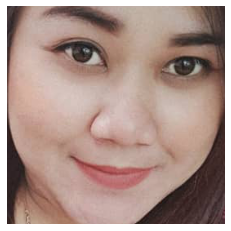

In [146]:
img_path = '../data/Testing/00f7b619-513e-4e43-bc32-ec49d233e09e.jpg'
image = io.imread(img_path)
detected_faces = detect_faces(image)

for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    plt.subplot(1, len(detected_faces), n + 1)
    plt.axis('off')
    plt.imshow(face)

In [104]:
model = load_model("../model/sequence/gender_classification_model.h5",
                   custom_objects={'f1_m': f1_m, 'recall_m': recall_m, 'precision_m': precision_m})

In [138]:
def get_classes(target):
    prob = model.predict(target)[0][0]
    if prob <= 0.5:
        return "female"
    else:
        return "male"

In [147]:
size = 224
face_target = Image.fromarray(image).crop(detected_faces[0])
h,w = face_target.size
img = img_to_array(face_target)
img = img / 255
img = img.reshape(1, h, w, 3)
classes = get_classes(img)

0.00040760636


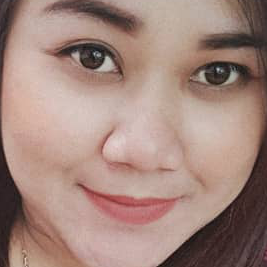

In [148]:
face_target

In [149]:
print("gender of person above is {}".format(classes))

gender of person above is female
